## Gradient Descent
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will implement gradien descent in Python and then use it on the Spotify dataset.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
import sys
from sklearn.model_selection import train_test_split

sns.set_theme()
from sklearn.metrics import mean_squared_error

In [3]:
def gradient_descent(X, y, alpha=0.05, epochs=10):
    """
    Performs the gradient descent algorithm.
    Inputs:
    - X: the feature matrix
    - y: the target values
    - alpha: the learning rate
    - epochs: the maximum number of iterations
    
    Returns:
    - w: the best-fit weights
    - mse: the mean squared error of the best-fit line
    - mse_values: the mean squared error at each iteration
    """
    
    mse_values = []
    
    # Initialize the weights
    w = np.random.rand(X.shape[1] + 1)
    n = len(X) 
    
    for _ in range(epochs):
        mse_values.append(mean_squared_error(y, np.dot(X, w[:-1]) + w[-1]))
        
        # Compute the predictions
        y_pred = np.dot(X, w[:-1]) + w[-1]
        
        # Compute derivatives
        
        for xi, yi, y_predi in zip(X, y, y_pred):
            error = yi - y_predi
            dw = -2/n * error * xi
            db = -2/n * error
            
        
        # Update the weights
        w[:-1] -= alpha * dw
        w[-1] -= alpha * db

        if np.linalg.norm(dw) < 1e-3:
            break
    
    mse = mean_squared_error(y, y_pred)
        
    return w, mse, mse_values
    

To use gradient descent, we will investigate Loudness vs. Energy in The Beatles songs via Linear Regression, and investigate the change in MSE over time.

In [4]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Make a subset of the data that only contains The Beatles
beatles = df[df['artists'] == 'The Beatles']

Text(0.5, 1.0, 'Loudness vs Energy in Beatles Songs')

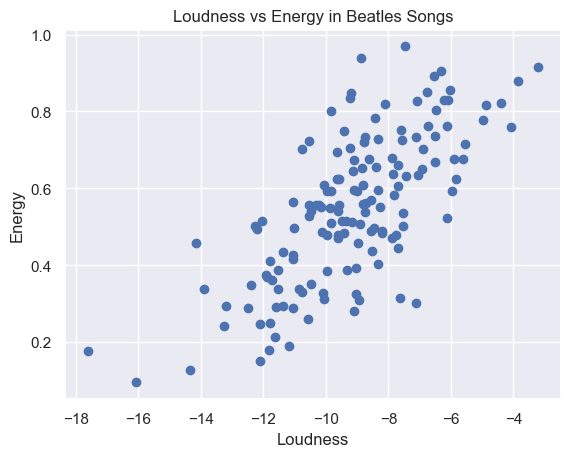

In [5]:
# Plot the loudness and energy of The Beatles songs
plt.plot(beatles['loudness'], beatles['energy'], 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy in Beatles Songs')

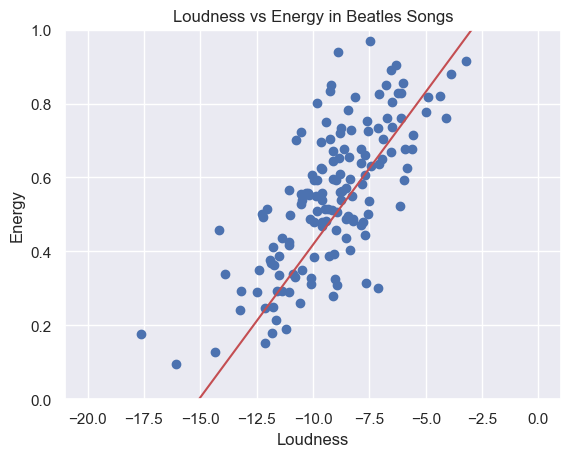

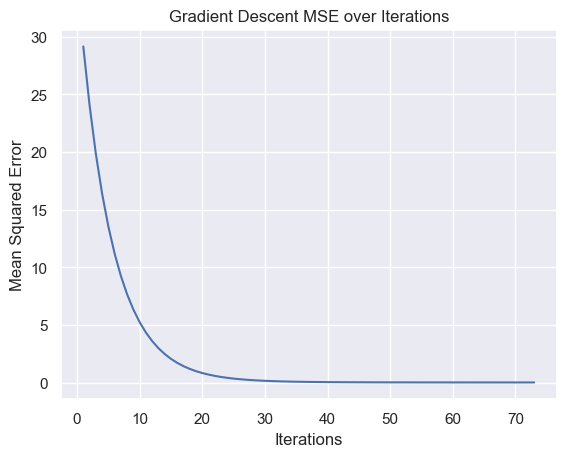

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
11016,11016,6dGnYIeXmHdcikdzNNDMm2,The Beatles,Abbey Road (Remastered),Here Comes The Sun - Remastered 2009,82,185733,False,0.557,0.540,...,-10.484,1,0.0347,0.0339,0.00248,0.1790,0.394,129.171,4,british
11017,11017,3BQHpFgAp4l80e1XslIjNI,The Beatles,Help! (Remastered),Yesterday - Remastered 2009,76,125666,False,0.332,0.179,...,-11.830,1,0.0326,0.8790,0.00000,0.0886,0.315,96.529,4,british
11018,11018,7iN1s7xHE4ifF5povM6A48,The Beatles,Let It Be (Remastered),Let It Be - Remastered 2009,77,243026,False,0.443,0.403,...,-8.339,1,0.0322,0.6310,0.00000,0.1110,0.410,143.462,4,british
11052,11052,1eT2CjXwFXNx6oY5ydvzKU,The Beatles,Love,Hey Jude,66,238854,False,0.462,0.632,...,-7.438,1,0.0248,0.0910,0.00000,0.3970,0.585,74.268,4,british
11055,11055,2EqlS6tkEnglzr7tkKAAYD,The Beatles,Abbey Road (Remastered),Come Together - Remastered 2009,77,259946,False,0.533,0.376,...,-11.913,0,0.0393,0.0302,0.24800,0.0926,0.187,165.007,4,british


In [17]:
# Using gradient descent to fit a line to the data
X = beatles['loudness'].values.reshape(-1, 1)
y = beatles['energy'].values

X = np.hstack([X, np.ones((len(X), 1))])

w, mse, mse_values = gradient_descent(X, y, alpha=0.05, epochs=10000)

# Plot the data
plt.plot(beatles['loudness'], beatles['energy'], 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.ylim(0, 1)
plt.title('Loudness vs Energy in Beatles Songs')

# Plot the best-fit line
x = np.linspace(-20, 0, 100)
y_pred = w[0] * x + w[1] + w[2]
plt.plot(x, y_pred, color='r')
plt.show()

# Plot the mean squared error over iterations to see if the algorithm is converging
iter_vector = np.arange(1, len(mse_values) +1)
plt.plot(iter_vector, mse_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent MSE over Iterations')
plt.show()
beatles.head()